<a href="https://colab.research.google.com/github/RJuro/AS2021/blob/main/AS21_eksamen_rette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eksamen: Anvendt Statistik 2021
### Aalborg University Business School, HA 1. Semester
#### Roman Jurowetzki

#### Rules of the game:

- Don't panic! - Hvis koden ikke virker (men virkede før). Gå tilbage, og kør oppefra ned. Også en god ide at tjekke, at koden er fejlfri ved at gøre denne øvelse undervejs.
- LÆS!!! hvad der står og hvad du forventes at lave!
- De fleste kodefejl er dumme stavefejl. Vær omhyggelig med kommaer, punkter etc.
- Hvis der er noget, som slet ikke kan løses, så kan du bare kommentere ud med `#`
- Husk, at output skal kunne ses (f.eks. dine plots)
- Play fair og lad være med at snyde! - Gruppearbejde er absolut IKKE tilladt.
- Tjek AAU mail mht mulige opdateringer fra undervisere undervejs
- Brug kun objektnavne, der blev defineret i opgaven
- Der afleveres som 👉 `ipynb` (**ikke PDF!**) - dvs, du skal bare downloade den fil du arbejder med fra colab eller bare aflevere den ipynb fil som du har åbent i Jupyter Lab.

In [ ]:
# importer pakker
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Korean Bakery
![](https://source.unsplash.com/surQ2mkZNxw)

I denne opgave møder du salgsdata fra en lille bageri, som også startede leverings service i juli 2019. Bageriet ligger i byen Chuncheon i Sydkorea og sælger en del [Angbutter](https://www.chopsticksandflour.com/ang-butter-scone-scone-with-sweet-red-bean-and-butter/) (Scone or Pretzel 😵 with Sweet Red Bean and Butter) - ellers er de fleste ting kendte produkter som også findes i bagerier herhjemme.

I opgaven kommer du til at rense og forberede salgsdata, tilføje andre produktoplysninger og foretage forskellige analyser, der kunne hjælpe bageriet med at justere deres output og vagtplaner.

Du skal arbejde med 2 filer:
- `Bakery_sales.csv` (salgsdata, hver observation er én bestilling)
- `Bakery_calories_prices.csv` (oversigt over priser og calorier mht de forskellige produkter)

Filerne findes også på:

- `https://github.com/SDS-AAU/ASEX2101/raw/main/Bakery_calories_prices.csv`
- `https://github.com/SDS-AAU/ASEX2101/raw/main/Bakery_sales.csv`


OBS: der er en del celler især i preprocessing delen, som du bare skal køre uden ændring

Lidt mere forklaring omkring variable (hvis du vil vide hvad det er for noget)

| variable             | explanation                                                                                                                                 |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| total:               | Total Amount.                                                                                                                               |
| place:               | customer's place                                                                                                                            |
| angbutter:           | It's a pain's name. Pretzel filled with red beans and gourmet butter. you can check [this link](https://www.10000recipe.com/recipe/6927002) |
| plain bread:         | plain bread.                                                                                                                                |
| jam:                 | peach jam.                                                                                                                                  |
| americano:           | americano                                                                                                                                   |
| croissant:           | croissant.                                                                                                                                  |
| caffe latte:         | caffe laffe.                                                                                                                                |
| tiramisu croissant:  | Croissants filled with tiramisu cream and fruit.                                                                                            |
| cacao deep:          | Croissant covered in Valrhona chocolate                                                                                                     |
| pain au chocolate:   | Pain au chocolate.                                                                                                                          |
| almond croissant:    | Croissant filled with almond cream.                                                                                                         |
| milk tea:            | Mariage Frères milk tea.                                                                                                                    |
| gateau chocolat:     | piece of chocolate cake.                                                                                                                    |
| pandoro: pandoro:    | Italian pain.                                                                                                                               |
| cheese cake:         | Cheese cake.                                                                                                                                |
| lemon ade:           | Lemon ade                                                                                                                                   |
| orange pound:        | Orange pound cake.                                                                                                                          |
| wiener:              | sausage bread.                                                                                                                              |
| vanila latte:        | Brewed with Madagascar vanilla bean.                                                                                                        |
| berry ade:           | berry ade.                                                                                                                                  |
| tiramisu:            | tiramisu cake.                                                                                                                              |
| merinque cookies:    | cookies.                                                                                                                                    |

## Indlæsning og preprocessing

In [ ]:
# 1.1
# brug pandas til at åbne datafiler (ingen zip, ingen specielle sep indstillinger)
sales = pd.read_csv('https://github.com/SDS-AAU/ASEX2101/raw/main/Bakery_sales.csv')
calories = pd.read_csv('https://github.com/SDS-AAU/ASEX2101/raw/main/Bakery_calories_prices.csv')

In [ ]:
# 1.2
# incpicer de første 5 rækker i datasættet
sales.head()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,order_id
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,53c4cf92206811ec971c2e2955813ea5
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,53c4d096206811ec971c2e2955813ea5
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53c4d0fa206811ec971c2e2955813ea5
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,53c4d154206811ec971c2e2955813ea5
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53c4d1a4206811ec971c2e2955813ea5


In [ ]:
# (kør uden ændring) det er en god idé ikke at have mellemrum i kolonnenavne
sales.columns = [col.replace(' ','_') for col in sales.columns]

In [ ]:
# incpicer de sidte 5 rækker i datasættet ved at bruge .tail() kommandoen
sales.tail()

,datetime,day_of_week,total,place,angbutter,plain_bread,jam,americano,croissant,caffe_latte,tiramisu_croissant,cacao_deep,pain_au_chocolat,almond_croissant,croque_monsieur,mad_garlic,milk_tea,gateau_chocolat,pandoro,cheese_cake,lemon_ade,orange_pound,wiener,vanila_latte,berry_ade,tiramisu,merinque_cookies,order_id
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53c881b4206811ec971c2e2955813ea5
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53c88222206811ec971c2e2955813ea5
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53c8829a206811ec971c2e2955813ea5
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53c88308206811ec971c2e2955813ea5
2653,2020-06-18 14:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53c88376206811ec971c2e2955813ea5


In [ ]:
# 1.3
# drop observationer hvor enten datetime eller day_of_week mangler

sales = sales.dropna(subset=['datetime','day_of_week'])

# derefter se igen på de sidste 5 rækker ved at køre sidste cell 

In [ ]:
# (kør uden ændring) Det er måske ikke så nemt at sige noget om 소양동 medmindre du kan læse koreansk - vi oversætter lige
sales['place'].replace({'소양동' : 'Soyang-dong', '효자 3동' : 'Hyoja3-dong', '후평 1동' : 'Hoopyeong1-dong', '후평 2동' : 'Hoopyeong2-dong', 
                           '석사동' : 'Seoksa-dong', '퇴계동' : 'Toegye-dong', '동면' : 'Dongmyeon', '후평 3동': 'Hoopyeong3-dong', "신사우동" : 'Sinsawoo-dong',
                          "강남동" : 'Gangnam-dong', "효자 1동": 'Hyoja1-dong', '조운동' : 'Jowoon-dong', '교동' : 'Gyo-dong', '효자 2동' : 'Hyoja2-dong', '약사명동' : 'Yaksamyeong-dong',
                          '근화동': 'Geunhwa-dong', '동내면' : 'Dongnae-myeon', '신동면' : 'Sindong-myeon', '교동 ': 'Gyo-dong'}, inplace = True)

In [ ]:
# 1.4
# lad os se på sales dataframes info - især hvad der mangler
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420 entries, 0 to 2419
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2420 non-null   object 
 1   day_of_week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain_bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe_latte         193 non-null    float64
 10  tiramisu_croissant  779 non-null    float64
 11  cacao_deep          323 non-null    float64
 12  pain_au_chocolat    587 non-null    float64
 13  almond_croissant    202 non-null    float64
 14  croque_monsieur     0 non-null      float64
 15  mad_garlic          0 non-null      float64
 16  milk_t

In [ ]:
# fjern variabler / kolonner (produkter), som aldrig bliver solgt (eller produceret)
sales.drop(['croque_monsieur', 'mad_garlic'], axis=1, inplace=True)

In [ ]:
# (kør uden ændring) fillna hjælper os med at indsætte værdier, hvor vi mangler
sales.place.fillna('onsite-takeout', inplace=True) #antager at bestillinger uden place er kunder, der afhenter
sales.fillna(0, inplace=True) # erstatter resten med 0

In [ ]:
# 1.5
# siden bestillinger er "events" skal der bruges timestamp som index - sæt datetime index

sales.index = pd.to_datetime(sales.datetime)

## Hvor mange kalorier har er der i vores bestillinger?

Her får du lige lidt kode, som du nok ikke kender. Kort forklaring:
Vores `calories` dataframe holder produktnavne, priser og kalorier. I hver bestilling er der flere produkter og hvis vi f.eks vil finde ud af hvor mange calorier er i sådan en bestilling, så skal vi summe calorier for alle købte produkter for hver bestilling.

I de fleste virksomheder arbejder man med relationale databaser (f.eks SQL) for at aggregere information som i vores case. Man plejer at have tabeller (dataframes) med kunder, produkter, bestillinger hvor der kan aggregeres (merge/join) mellem dem hvis man vil have en oversigt såsom: bestillinger af en bestimmt produktype fordelt på regioner.

#### Plan of attack
Vores bestillinger her kommer i et "wide" format - men for at aggregere calorier skal det omformes til "long", hvor hver række repræsenterer et produkt i én bestilling. Bestillinger har en unik id, som automatisk gentages for hvert produkt, der er bestillt.

Vores bestillinger i long format kan eftersølgende "merges" med calorie-data og så kan vi gruppere dem igen og udregne hvor mange kalorier der er i hver bestilling.

In [ ]:
# (kør uden ændring) vi bruger pivot_table for at restrukturere vores data 

order_product_columns = ['order_id','angbutter', 'plain_bread',
       'jam', 'americano', 'croissant', 'caffe_latte', 'tiramisu_croissant',
       'cacao_deep', 'pain_au_chocolat', 'almond_croissant', 'milk_tea',
       'gateau_chocolat', 'pandoro', 'cheese_cake', 'lemon_ade',
       'orange_pound', 'wiener', 'vanila_latte', 'berry_ade', 'tiramisu',
       'merinque_cookies']

order_product_list = pd.pivot_table(sales[order_product_columns], index='order_id').stack().reset_index()

order_product_list.columns = ['order_id', 'product_name', 'count']

In [ ]:
# se på de første 5 rækker - du kan se, at vi nu har objekt_id, navne og antal af produkt per bestilling
order_product_list.head()

,order_id,product_name,count
0,53c4cf92206811ec971c2e2955813ea5,almond_croissant,0.0
1,53c4cf92206811ec971c2e2955813ea5,americano,1.0
2,53c4cf92206811ec971c2e2955813ea5,angbutter,1.0
3,53c4cf92206811ec971c2e2955813ea5,berry_ade,0.0
4,53c4cf92206811ec971c2e2955813ea5,cacao_deep,0.0


In [ ]:
# se lige ind i calories dataframe (5 første rækker)
calories.head()

,product_name,price,calories
0,angbutter,4800,600
1,plain bread,3500,79
2,jam,1500,56
3,americano,4000,15
4,croissant,3500,406


In [ ]:
# kør uden ændring: husk, at skifte navne (mellemrum -> _) så det passer sammen med vores kolonner (navne i salg )

calories.product_name = calories.product_name.str.replace(' ','_')

In [ ]:
# 2.1
# order_product_list of calories har begge to product_name kolonnen og vi kan aggregere dem i en ny dataframe

orders_calories = order_product_list.merge(calories)

In [ ]:
# 2.2
# husk, at vi skal gange med antal af de enkelte produkter i vores bestillinger f.eks hvis der er 2 corissaner
orders_calories['calories'] = orders_calories['calories'] * orders_calories['count']

In [ ]:
# 2.3
# beregn summen af calorier per order_od - du kan behandle order_od(er) som grupper
orders_calories = orders_calories.groupby('order_id').calories.sum()

In [ ]:
# tjek resultatet, det burde være en Pandas Series med order_id som index og summen af calorier per bestilling som værdi

orders_calories

order_id
53c4cf92206811ec971c2e2955813ea5    2265.0
53c4d096206811ec971c2e2955813ea5    1390.0
53c4d0fa206811ec971c2e2955813ea5    7700.0
53c4d154206811ec971c2e2955813ea5     679.0
53c4d1a4206811ec971c2e2955813ea5    1750.0
                                     ...  
53c8002c206811ec971c2e2955813ea5    1195.0
53c8009a206811ec971c2e2955813ea5    1290.0
53c80108206811ec971c2e2955813ea5    1229.0
53c80176206811ec971c2e2955813ea5    1491.0
53c801e4206811ec971c2e2955813ea5    2460.0
Name: calories, Length: 2420, dtype: float64

Du kan nu aggregere tilbage (merge) til vores salgsdata ved at bruge orfer_id som nøgle.

In [ ]:
# 2.4
# sales og orders_calories skal nu aggregeres hvor order_id bruges som nøgle. 
# Husk, at orders_calories har den som index
sales = sales.merge(orders_calories, left_on='order_id', right_index=True)

In [ ]:
# en sidste ting: Det er en god idé at have en kolonne der viser antallet af produkter for hver bestilling
# og en med calorier per antal af produkter
sales['n_items'] = sales.iloc[:,4:25].sum(axis=1)
sales['cal_per_item'] = sales['calories'] / sales['n_items']

## Analyse

Hvis du fik problemer med preprocessing, så kan du arbejde videre herfra ved at åbne `sales_prep.csv` eller `https://github.com/SDS-AAU/ASEX2101/raw/main/sales_prep.csv`
Der skal laves datetime-index ved at køre `sales.index = pd.to_datetime(sales.datetime)`

**Bonus info**: Der kommer nogle opsamlinger over tid, pandas arbejder med: `D: day; W: week, M: month.`

In [ ]:
# alternativ for dig, der fik problemer i preprocessing
# sales = pd.read_csv('https://github.com/SDS-AAU/ASEX2101/raw/main/sales_prep.csv')
# sales.index = pd.to_datetime(sales.datetime)

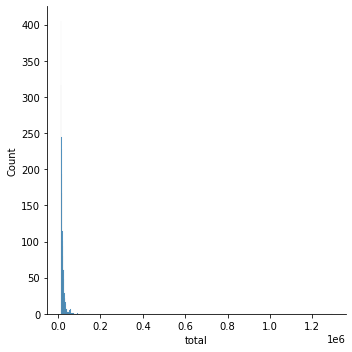

In [ ]:
# 3.1
# tjek fordeling af total variablen ved at plotte histogram (op til dig hvordan)
sns.displot(sales.total)

In [ ]:
# 3.2
# ser ud som en eller få oufliers - sorter dataframe mht total - start med højeste 
sales.total.sort_values(ascending=False)

datetime
2019-07-26 11:36:00    1293000.0
2020-01-15 11:28:00     116500.0
2019-12-30 12:23:00      91300.0
2020-01-23 11:08:00      77100.0
2019-07-26 11:23:00      73200.0
                         ...    
2019-12-06 11:38:00      13800.0
2019-12-06 15:25:00      13800.0
2019-12-07 14:02:00      13600.0
2019-08-01 11:17:00      13100.0
2019-11-22 16:02:00      12800.0
Name: total, Length: 2420, dtype: float64

In [ ]:
# 3.3
# du kan tjekke outlier bestilling ved at subsette sales med datetime af denne bstilling
# dvs. copy-paste datetime-index som string
sales['2019-07-26 11:36:00']

,datetime,day_of_week,total,place,angbutter,plain_bread,jam,americano,croissant,caffe_latte,tiramisu_croissant,cacao_deep,pain_au_chocolat,almond_croissant,milk_tea,gateau_chocolat,pandoro,cheese_cake,lemon_ade,orange_pound,wiener,vanila_latte,berry_ade,tiramisu,merinque_cookies,order_id,calories,n_items,cal_per_item
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-26 11:36:00,2019-07-26 11:36,Fri,1293000.0,onsite-takeout,6.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53c4ec66206811ec971c2e2955813ea5,11175.0,31.0,360.483871


#### Salg i løbet af dagen

In [ ]:
# 3.4
# lav en gruppering hvor du kigger på summen af solgte ting n_items for hver time
# timer findes i sales.index.hour
sales.groupby(sales.index.hour).n_items.sum()

datetime
11    3360.0
12    2423.0
13    1971.0
14    1515.0
15     927.0
16     532.0
17     102.0
22       3.0
23       7.0
Name: n_items, dtype: float64

#### Salg per dag, uge, måned

In [ ]:
# 3.5
# bestillinger skal aggregeres per dag, uge, måned og alle nummeriske værdier summes
daily_sales = sales.resample('D').sum()
weekly_sales = sales.resample('W').sum()
monthly_sales = sales.resample('M').sum()

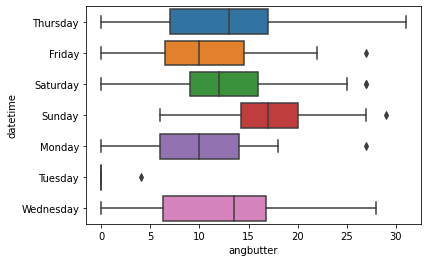

In [ ]:
# 3.6
# lav en boxplot, der viser fordelinger i daglige salg af angbutter for de forskellige ugedage:
# du kan bruge daily_sales.index.day_name() for at tilgå navne på ugedagene i din datetime-index

sns.boxplot(x=daily_sales.angbutter, y=daily_sales.index.day_name())

In [ ]:
# Hvad kan du konkludere? (2-3 punkter)
# Svar: 

# - flere bestillinger søndag (folk hygger)
# - Tirsdag er måske lukket
# Onsdag og Torsdag større salg men også mere varians

In [ ]:
# Holder de lukket hver tirsdag? Hvordan kunne man tjekke det? 
# Beskriv kort strategi og måske kode.

# groupby weekday, count bestillinger / dag

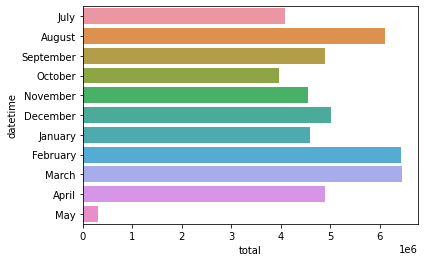

In [ ]:
# 3.7
# er der måneder, hvor det går rigtig godt eller omvendt? lav en barplot med total på x 
# og month_name() - tilgås som day_name() - på y
sns.barplot(x=monthly_sales.total, y=monthly_sales.index.month_name())

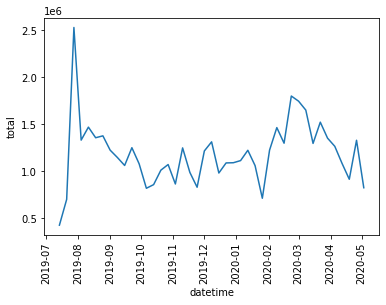

In [ ]:
# 3.8
# lav en lineplot som viser salgsudvikling per uge over tid index på x, total på y
plt.xticks(rotation = 'vertical')
sns.lineplot(x = weekly_sales.index, y = weekly_sales.total)

In [ ]:
# kan vi se effekten af COVID19?
# Svar: ja, stigning feb/mar 2020

In [ ]:
# Hvorfor sælger de (ifølge data) ikke noget i maj?
# Svar: Data for Maj mangler

#### Geografi

In [ ]:
# 4.1
# Geografisk fordeling: Hvor mange bestillinger kommer der fra de forskellige nabolag

sales.place.value_counts()

Dongmyeon           416
onsite-takeout      254
Hoopyeong2-dong     254
Hoopyeong3-dong     249
Hoopyeong1-dong     196
Seoksa-dong         169
Toegye-dong         146
Hyoja2-dong         143
Soyang-dong         132
Sinsawoo-dong        91
Hyoja3-dong          80
Gyo-dong             67
Gangnam-dong         52
Hyoja1-dong          50
Jowoon-dong          37
Dongnae-myeon        31
Geunhwa-dong         29
Yaksamyeong-dong     23
Sindong-myeon         1
Name: place, dtype: int64

In [ ]:
# Det samme igen bare vis andel
sales.place.value_counts(normalize=True)

Dongmyeon           0.171901
onsite-takeout      0.104959
Hoopyeong2-dong     0.104959
Hoopyeong3-dong     0.102893
Hoopyeong1-dong     0.080992
Seoksa-dong         0.069835
Toegye-dong         0.060331
Hyoja2-dong         0.059091
Soyang-dong         0.054545
Sinsawoo-dong       0.037603
Hyoja3-dong         0.033058
Gyo-dong            0.027686
Gangnam-dong        0.021488
Hyoja1-dong         0.020661
Jowoon-dong         0.015289
Dongnae-myeon       0.012810
Geunhwa-dong        0.011983
Yaksamyeong-dong    0.009504
Sindong-myeon       0.000413
Name: place, dtype: float64

In [ ]:
# Hvad er andelen af kunder, der kommer og henter deres søde sager?
# Svar: ~10%

In [ ]:
# 4.2
# hvem spiser mest? Beregn gennemsnit af calorier i bestillinger for de forskellige bydele
# sorter fra højeste til laveste
sales.groupby('place').calories.mean().sort_values(ascending=False)

place
Sindong-myeon       2656.000000
Dongnae-myeon       2031.419355
Seoksa-dong         1948.142012
Jowoon-dong         1913.135135
Geunhwa-dong        1912.379310
Toegye-dong         1881.616438
Gangnam-dong        1868.903846
Yaksamyeong-dong    1862.434783
Hyoja1-dong         1844.440000
onsite-takeout      1841.917323
Sinsawoo-dong       1836.186813
Hyoja2-dong         1744.384615
Soyang-dong         1710.469697
Dongmyeon           1694.990385
Hoopyeong1-dong     1690.020408
Gyo-dong            1614.671642
Hyoja3-dong         1551.412500
Hoopyeong2-dong     1539.858268
Hoopyeong3-dong     1537.080321
Name: calories, dtype: float64

In [ ]:
# Er der nogle bydele hvor vi måske ikke skal stole på disse beregninger 
# hvis man tager hensyn til den beregning der blev foretaget inden?
# Skriv navne på 1 eller 2

# Svar: Sindong-myeon; Yaksamyeong-dong

In [ ]:
# 4.3
# Får vi et andet billede ved at se på gennemsnit af cal_per_item i de forskellige bydele?
sales.groupby('place').cal_per_item.mean().sort_values(ascending=False)

place
Geunhwa-dong        441.048768
Gyo-dong            419.654691
Hyoja2-dong         410.539573
Toegye-dong         404.651422
Hyoja3-dong         403.204643
Soyang-dong         400.686440
onsite-takeout      400.221219
Hyoja1-dong         399.854063
Dongnae-myeon       395.885906
Gangnam-dong        395.012332
Yaksamyeong-dong    394.464251
Seoksa-dong         389.225417
Jowoon-dong         384.762519
Sinsawoo-dong       383.003811
Dongmyeon           380.744770
Sindong-myeon       379.428571
Hoopyeong3-dong     378.624121
Hoopyeong1-dong     375.347175
Hoopyeong2-dong     367.581837
Name: cal_per_item, dtype: float64

### Kaffee vs Croissant

Folk, der bestiller kaffee bestiller også croissant - ekker hvad?
Brug korrelation til at se om der måske er sammenhæng på uge-niveau.

In [ ]:
# 5.1
# lav en ny variable 'coffee' i weekly_sales, som summer værdier for americano, caffe_latte og vanila_latte
weekly_sales['coffee'] = weekly_sales['americano'] + weekly_sales['caffe_latte'] + weekly_sales['vanila_latte']

In [ ]:
# 5.2
# beregn en korrelationstable for coffee, angbutter, plain_bread og vroissant
weekly_sales[['angbutter','plain_bread','croissant','coffee']].corr()

,angbutter,plain_bread,croissant,coffee
angbutter,1.000000,0.648669,0.598729,0.448183
plain_bread,0.648669,1.000000,0.335434,0.559268
croissant,0.598729,0.335434,1.000000,0.175626
coffee,0.448183,0.559268,0.175626,1.000000


In [ ]:
# Hvad kan vi mulighvis sige om kaffee vs croissaner (og de andre produkter)?
# kaffe bliver muligvis mest købt sammen med plain_bread; ikke med croissant